In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import glob
import pandas as pd
import ast

plt.style.use('seaborn-white')
mpl.rcParams.update({'font.size': 16})

## Extending Fe Calibration to Additional Elements

We've calibrated our TAME measurements by using a sample of by-hand equivalent widths for comparison. As we expand our linelist, we'll want to apply similar calibration to those lines as well. This notebook explores general trends in the Fe calibration to use as a 0th order calibration for lines where we have no by-hand measurements.

### Distribution of Fe Lowercut Values

What is the most common lowercut value preferred by the Fe lines?

In [69]:
df = pd.read_csv("tame_linecorr.csv", delim_whitespace = True)

feII = [5018.44, 5234.63,5284.1,5325.56,5414.05,5425.25,5991.37,
        6084.1,6149.25,6247.58,6416.92,6432.68,6456.38]

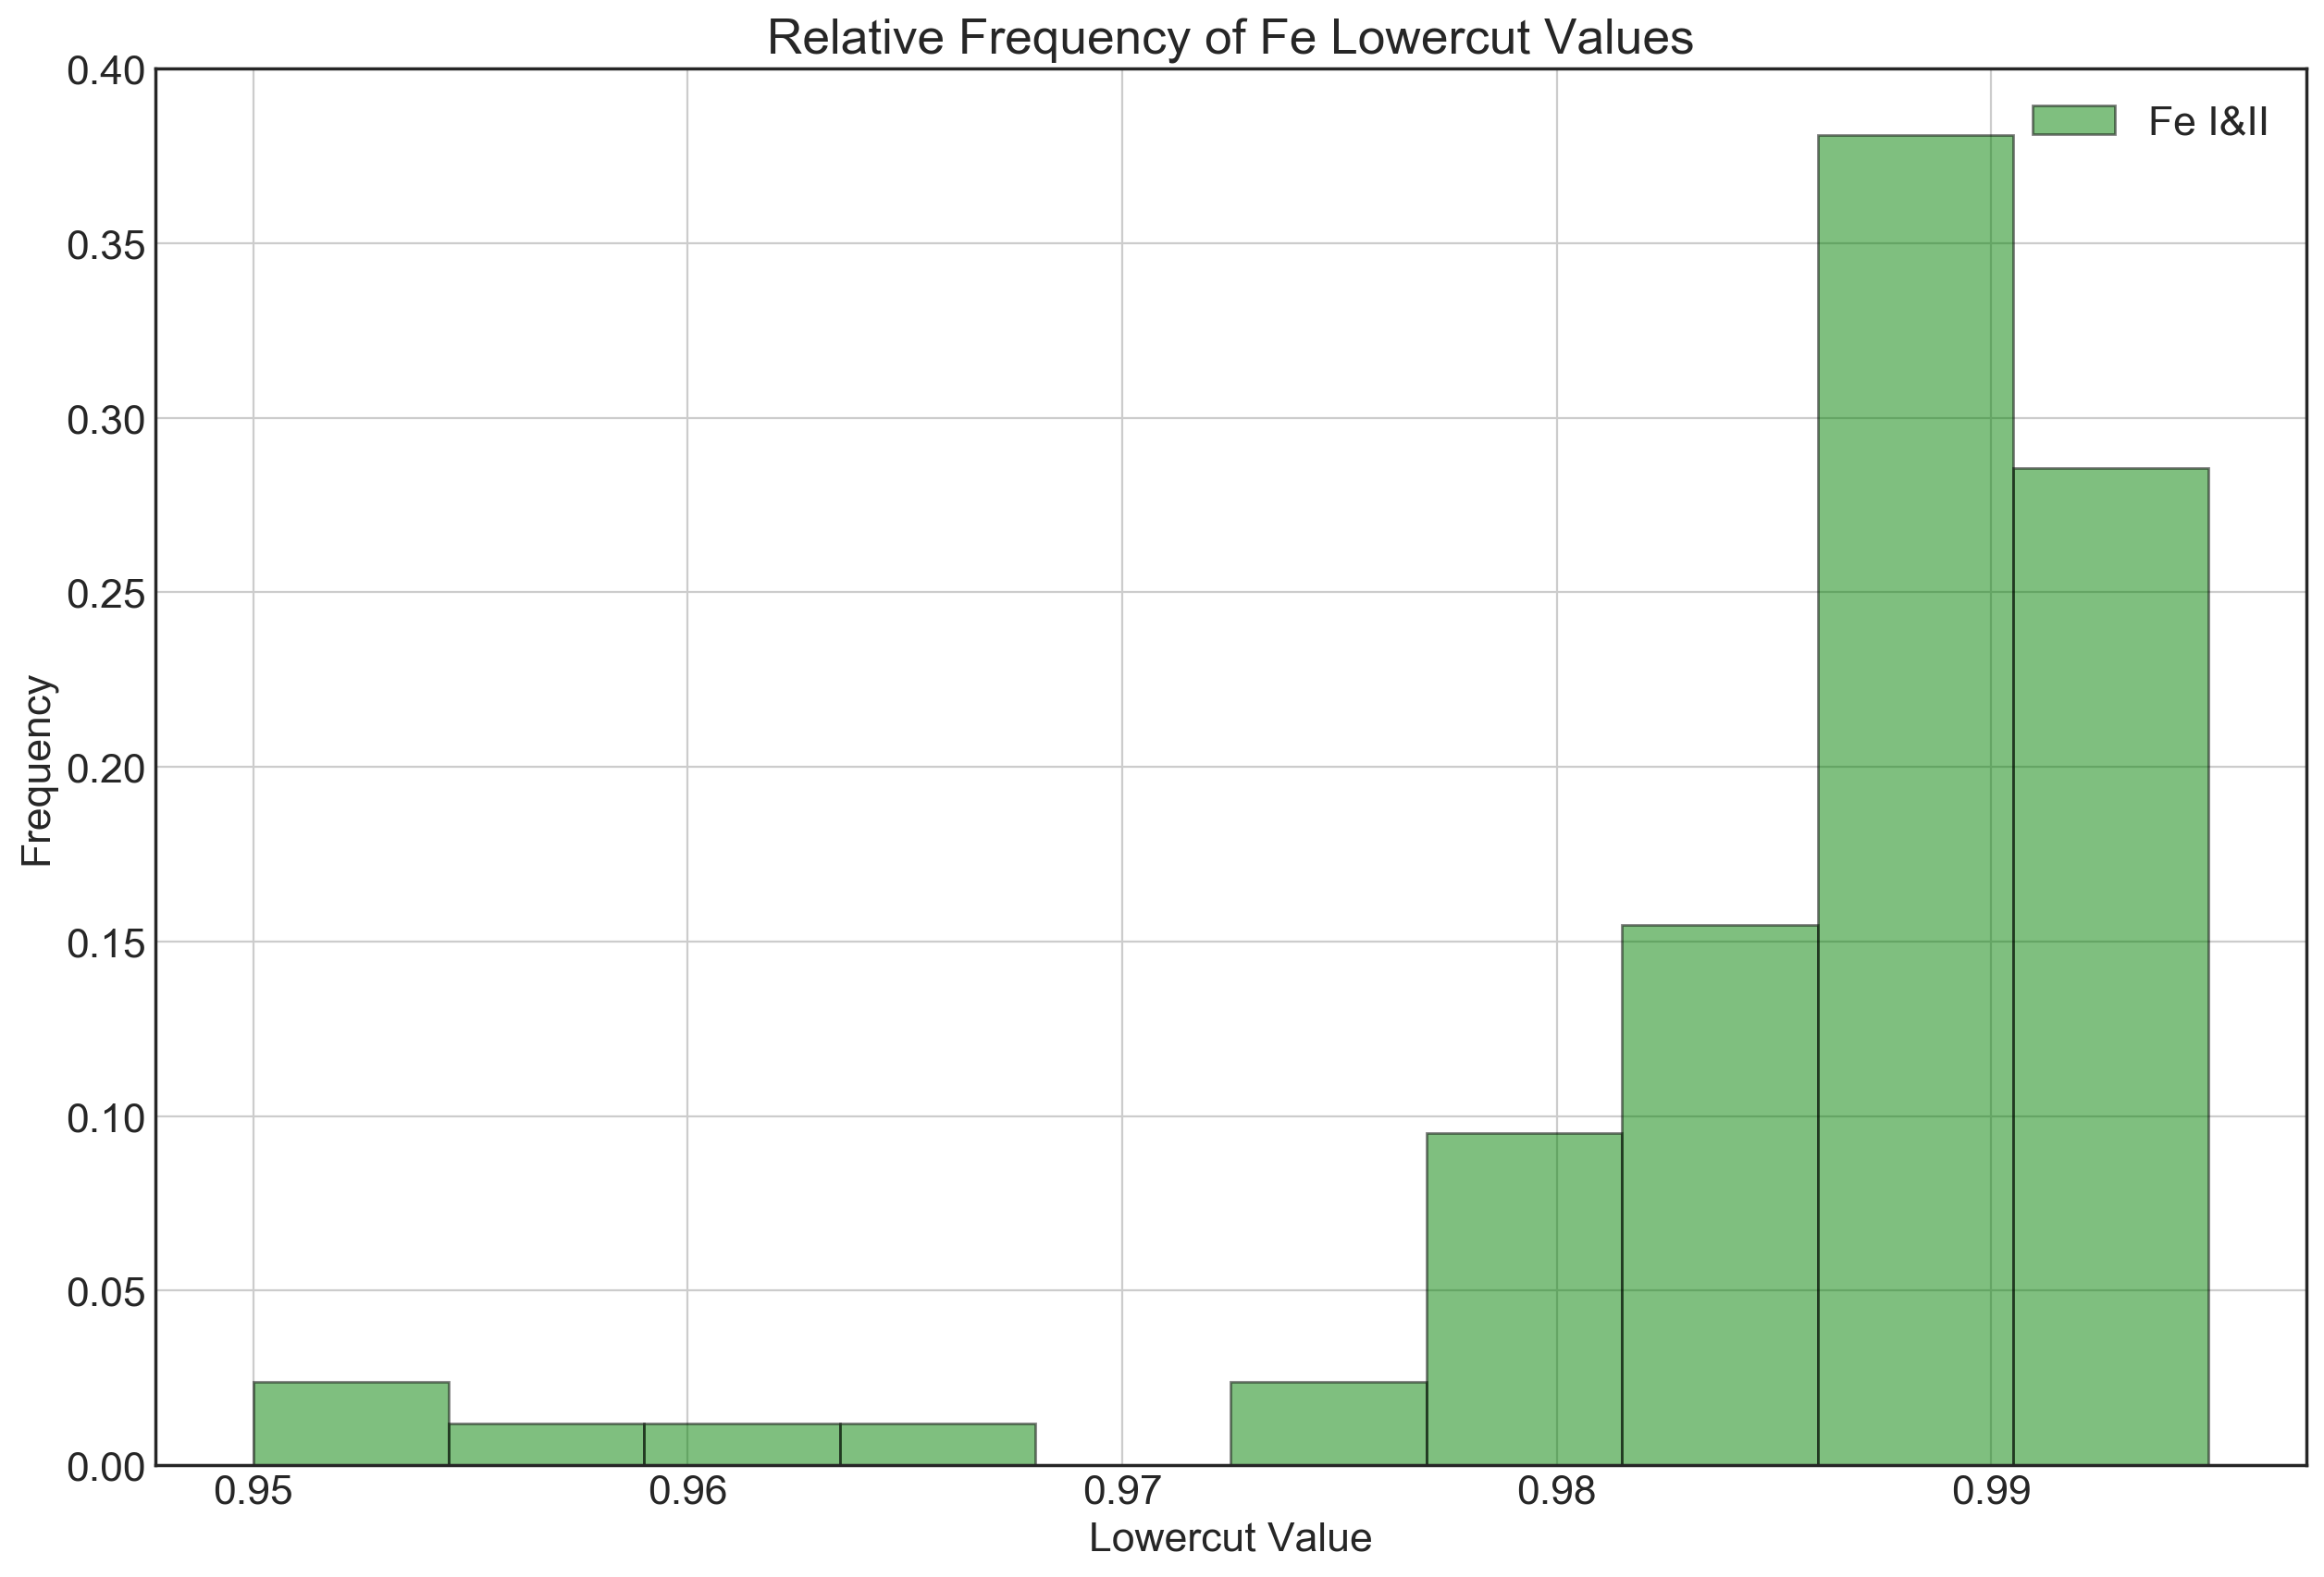

In [70]:
fig = plt.figure(figsize=(15,10), dpi = 200)
plt.grid()
plt.title("Relative Frequency of Fe Lowercut Values")
plt.xlabel("Lowercut Value")
plt.ylabel("Frequency")

bins=np.histogram(np.hstack(df['Lowercut']), bins=10)[1] #designate a consistent binsize across 
plt.hist(df['Lowercut'], histtype='bar', ec='black', bins=bins, color='g', alpha=0.5, 
         weights=np.zeros_like(df['Lowercut']) + 1. / len(df['Lowercut']), label = "Fe I&II")
plt.legend()

Is there a distribution difference between the Fe ionization states?

From this sample size, no. Both states have similar relative frequency for the common lowercut values and differ for the less common ones (which is likely just outlier noise). Since these are similar, this strengthens the case for assuming a similar distribution of lowercut values for any given element. Essentially, this distribution likely represents systematic TAME selection rather than element specific selection.

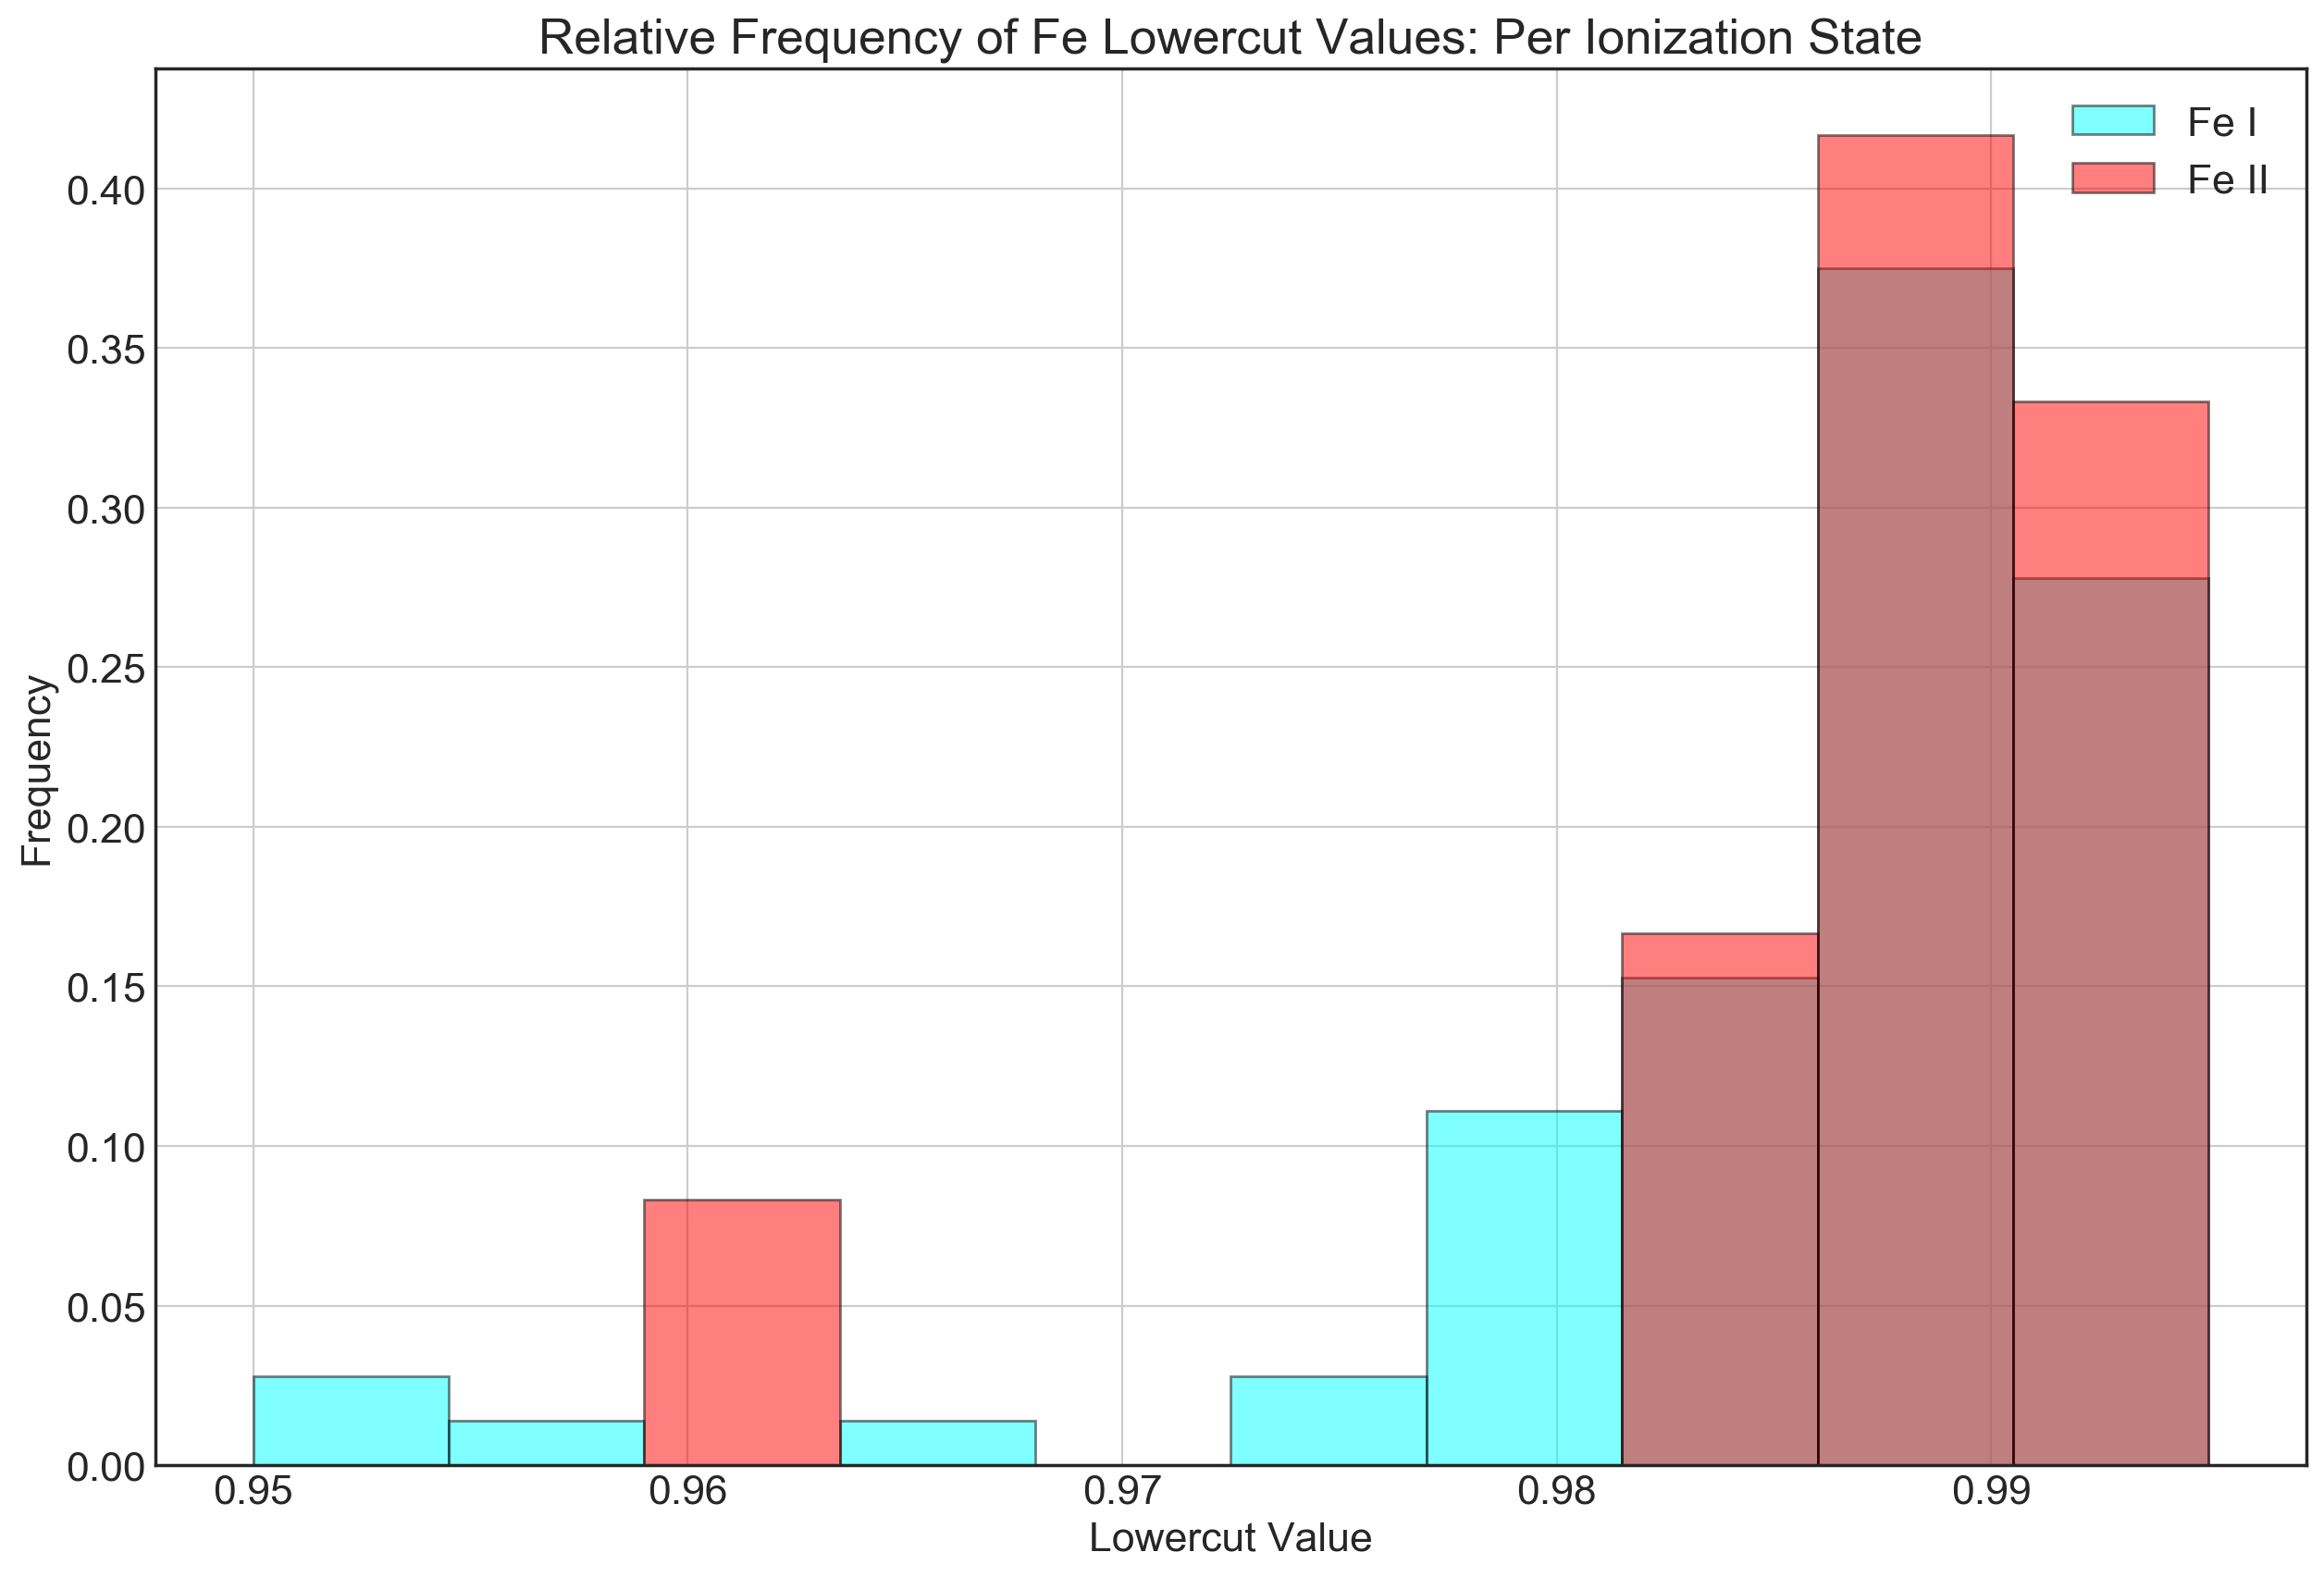

In [68]:
feI_lc = []
feII_lc = []
for line in np.array(df['Line']):
    idx = df[df['Line']==line].index.values.astype(int)[0]
    if line in feII:
        feII_lc.append(df['Lowercut'][idx])
    else:
        feI_lc.append(df['Lowercut'][idx])

fig = plt.figure(figsize=(15,10), dpi = 200)
plt.grid()
plt.title("Relative Frequency of Fe Lowercut Values: Per Ionization State")
plt.xlabel("Lowercut Value")
plt.ylabel("Frequency")

bins=np.histogram(np.hstack(df['Lowercut']), bins=10)[1] #designate a consistent binsize across 


plt.hist(feI_lc, histtype='bar', ec='black', bins=bins, color='cyan', alpha=0.5, 
         weights=np.zeros_like(feI_lc) + 1. / len(feI_lc), label = "Fe I")
plt.hist(feII_lc, histtype='bar', ec='black', bins=bins, color='r', alpha=0.5, 
         weights=np.zeros_like(feII_lc) + 1. / len(feII_lc), label="Fe II")

plt.legend()

### Distribution of Uncertainties and Offset Values for a Given Lowercut Value

For a given lowercut value, across all Fe lines how consistent do its uncertainties and offset values stay?

In [71]:
df_v2 = pd.read_csv("tame_linecorr_v2.csv", delim_whitespace = True)

feII = [5018.44, 5234.63,5284.1,5325.56,5414.05,5425.25,5991.37,
        6084.1,6149.25,6247.58,6416.92,6432.68,6456.38]

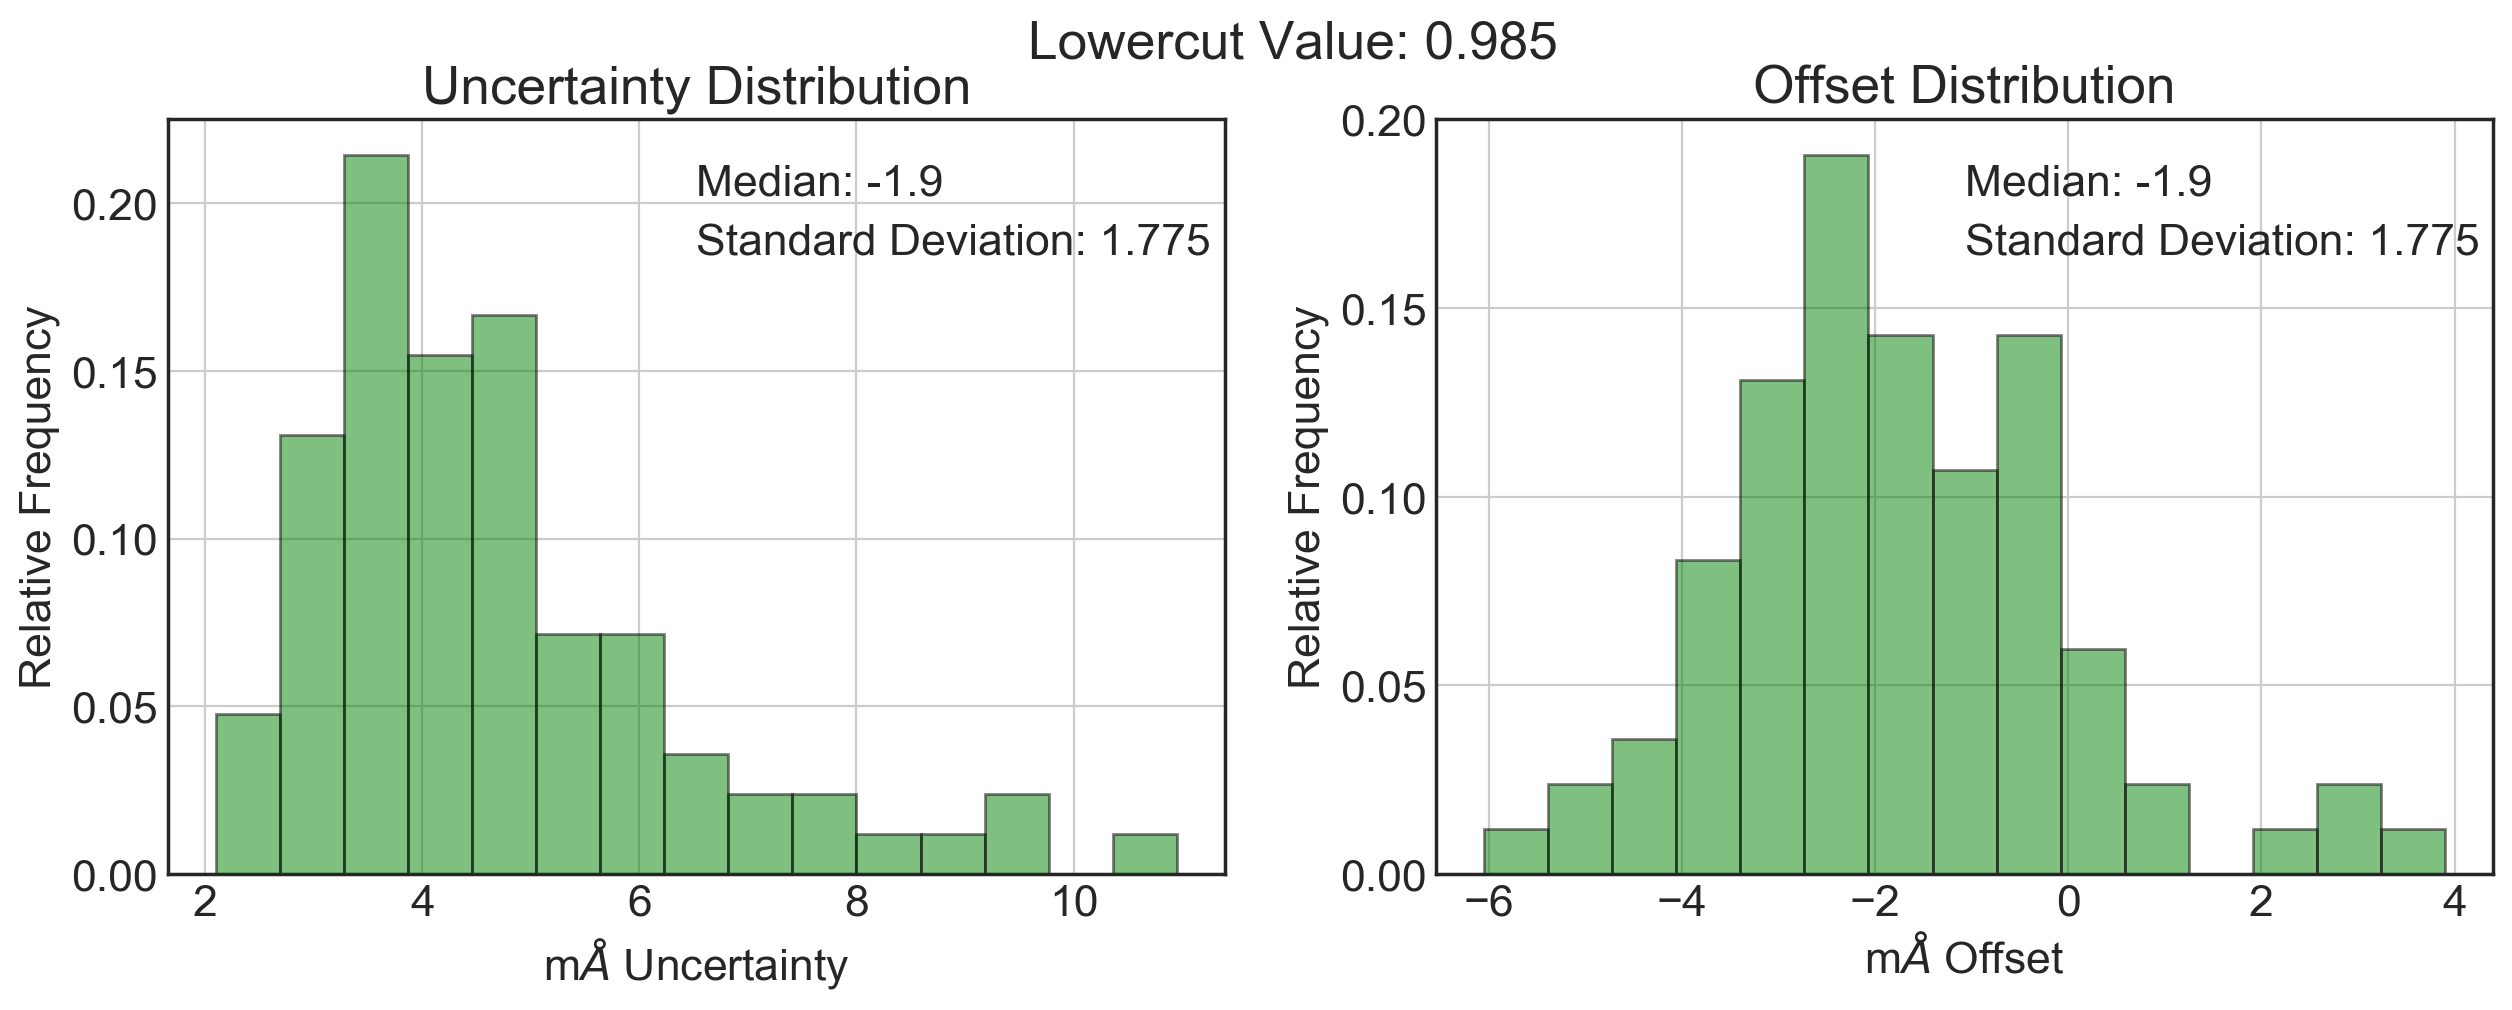

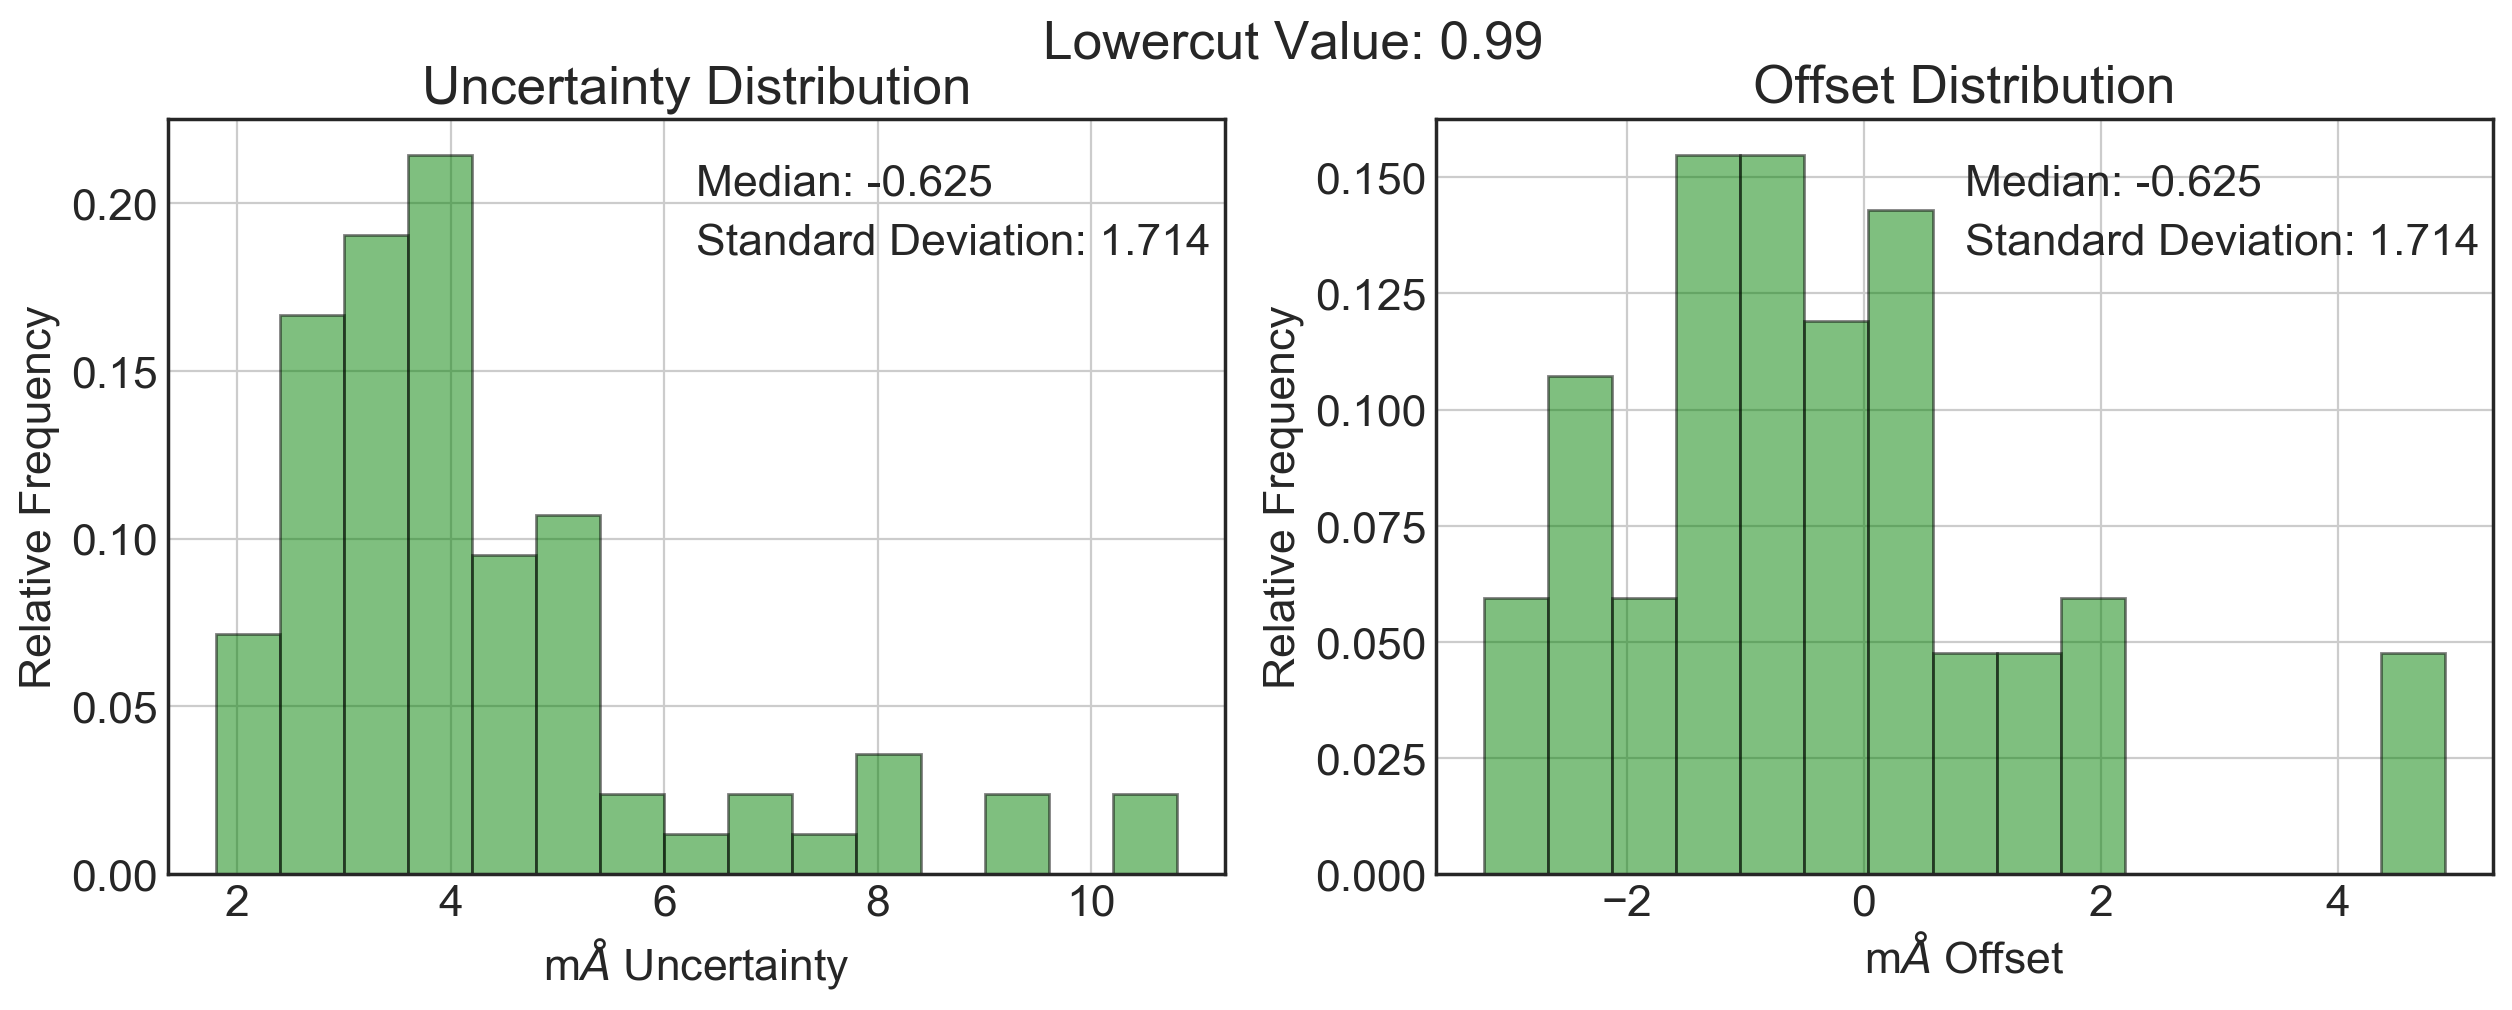

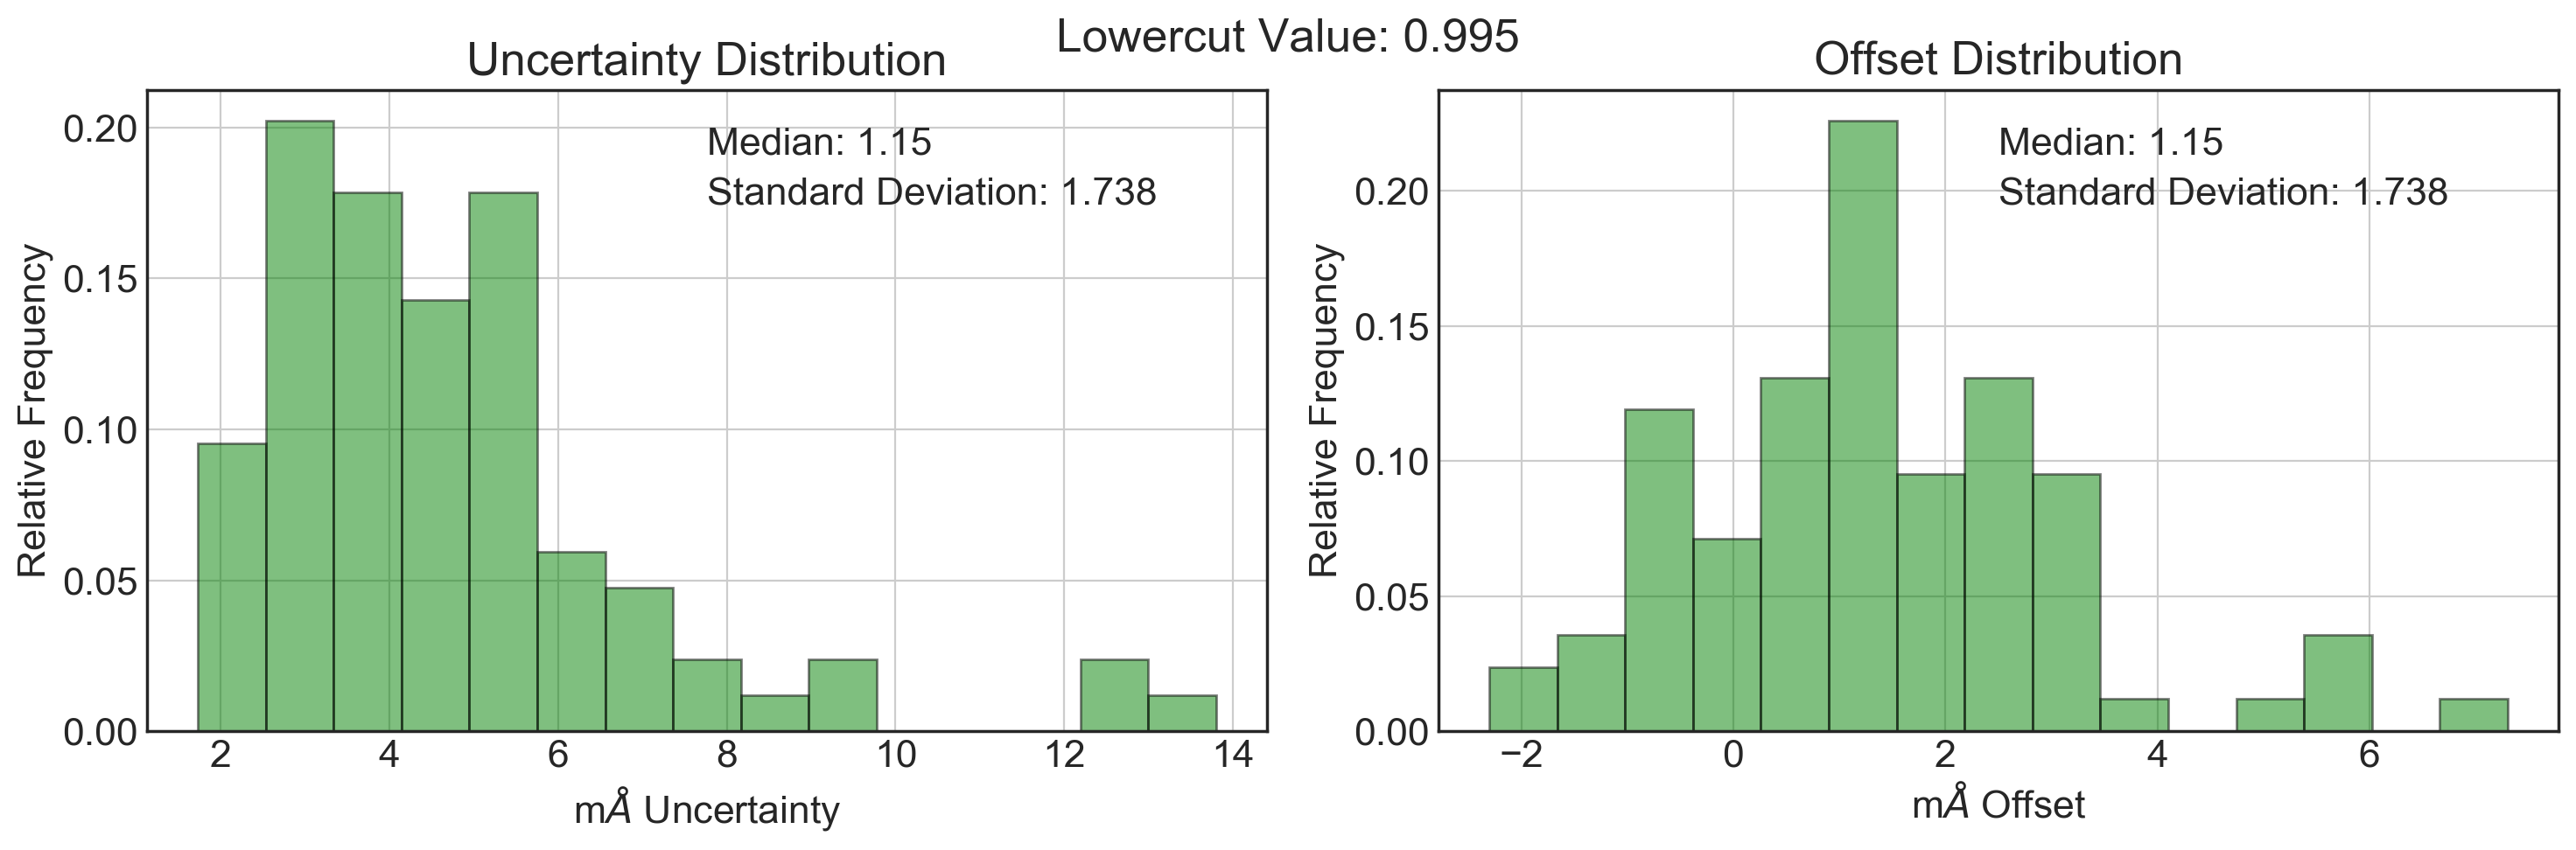

In [160]:
#fig, axes = plt.subplots(1,3, figsize = (15,5), dpi = 200)
common_lc = [0.985, 0.99, 0.995]

for lc in common_lc:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5), dpi = 200)
    fig.suptitle("Lowercut Value: {}".format(lc))
    offset = []
    unc = []
    for row in df_v2.iterrows():
        vals = ast.literal_eval(row[1]['Calibration Values'])
        lc_vals = [item for item in vals if lc in item][0]
        unc.append(lc_vals[1])
        offset.append(lc_vals[2])
    
    bins=np.histogram(np.hstack(unc), bins=15)[1] #designate a consistent binsize across 
    ax1.hist(unc, histtype='bar', ec='black', bins=bins, color='g', alpha=0.5, 
         weights=np.zeros_like(unc) + 1. / len(unc))
    ax1.grid()
    ax1.set_title("Uncertainty Distribution")
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel(r"m$\AA$ Uncertainty")
    ax1.text(0.5,0.9,"Median: {}".format(np.round(np.median(offset),3)), transform=ax1.transAxes)
    ax1.text(0.5,0.82,"Standard Deviation: {}".format(np.round(np.std(offset),3)), transform=ax1.transAxes)
    
    bins=np.histogram(np.hstack(offset), bins=15)[1] #designate a consistent binsize across 
    ax2.hist(offset, histtype='bar', ec='black', bins=bins, color='g', alpha=0.5, 
         weights=np.zeros_like(offset) + 1. / len(offset))
    ax2.grid()
    ax2.set_title("Offset Distribution")
    ax2.set_ylabel("Relative Frequency")
    ax2.set_xlabel(r"m$\AA$ Offset")
    ax2.text(0.5,0.9,"Median: {}".format(np.round(np.median(offset),3)), transform=ax2.transAxes)
    ax2.text(0.5,0.82,"Standard Deviation: {}".format(np.round(np.std(offset),3)), transform=ax2.transAxes)
    

plt.tight_layout()